# Recesiones en México

Arthur Burns y Wesley Michell en 1946 en su libro "Measuring Bussiness Cycles" definen al ciclo económico como:

"…*las fluctuaciones en la actividad agregada de un país que se encuentra organizada en empresas de negocios*…"

**El ciclo económico clásico se caracteriza por tres fases principales:** 

I.	**Recesión**: es la etapa donde la actividad económica comienza a disminuir y termina cuando la actividad económica alcanza su punto más bajo. 

II.	**Recuperación**: comienza cuando la actividad económica comienza a crecer despues de una recesión y termina cuando la actividad alcanza el nivel del pico donde comenzó la recesión.

III. **Expansión**: Es cuando la actividad económica se está expandiendo y supera el nivel del pico de la recesión.


Un ciclo económico clásico se vería de la siguiente manera

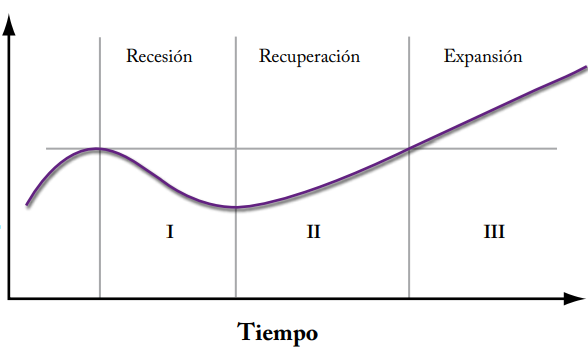

Fuente: Jonathan Heath (2012), Lo que indican los indicadores. Cómo utilizar la información estadística para entender la realidad económica de México. INEGI. versión electrónica: https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825003406

De acuerdo con el Cómite de Fechado de Ciclos de la Economía de México, han ocurrido las siguientes recesiones desde 1980 hasta la actualidad.

| | Recesión  | Fecha inicio    | Fecha Fin   | Duración   |
|---:|:-------------|:-----------|:------|:------|
| 1 | Crisis del 82 | Dic-1981       | Jun-1983   | 19 meses     |
| 2 | Crisis del 86  | Oct-1985    | Dic-1986   | 15 meses     |
| 3 | Crisis del 94  | Dic-1994    | May-1995   | 6 meses     |
| 4 | Crisis del 01  | Oct-2000    | Ene-2002   | 16 meses     |
| 5 | Crisis del 08  | Jul-2008    | May-2009   | 11 meses     |
| 6 | Crisis del Covid | Jun-2019    | May-2020   | 12 meses     |

Por lo tanto en esta notebook se analizara el último ciclo económico de la economía mexicana. Pero antes de nuestro análisis graficaremos y veremos los ciclos de la economía mexicana y la evolución del PIB trimestral desestacionalizado.

**Antes que nada importamos las librerías básicas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

primero importamos los datos de los archivos que se adjuntan en esta tarea

In [ ]:
## los datos mensuales de las recesiones
datos_rec = pd.read_excel('recesionmex.xlsx')

## los datos del PIB de México
pib_trim=pd.read_excel('pib_trim.xlsx')

asegurarse que las fechas sean fechas

In [ ]:
## convertimos en fechas los datos de recesión
datos_rec['fecha']=pd.to_datetime(datos_rec['fecha'])
# convertimos en fechas los datos del PIB
pib_trim.fecha=pd.PeriodIndex(pib_trim.fecha, freq='Q')

In [ ]:
#creamos un duplicado de los datos de recesión
datos_rec2=datos_rec.copy()

## recesiones es un 1, así que multiplicamos para que las areas gris lleguen cubra los limites del eje Y
datos_rec2['recesion']=datos_rec2['recesion']*pib_trim['PIB'].max()*1.1


**Graficamos y sombreamos las recesiones**

In [ ]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
datos_rec2.plot.area(ax=ax, figsize=(10, 7), x='fecha', alpha=0.5, color="gray")
plt.ylim(pib_trim['PIB'].min()*0.9, pib_trim['PIB'].max()*1.1)
plt.show()

**Graficamos la última recesión de México**

In [ ]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim('2015-01-01', '2022-06-01')
plt.show()

como podras notar aun no se recupera el nivel del PIB que México tenia previo a la pandemia, la pregunta es **¿cuándo recuperara México el PIB previo de la recesión de la Pandemia?**

In [ ]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
ax.axhline(y=pib_trim['PIB'].max(), color="gray", linestyle='--')
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim('2017-01-01', '2024-06-01')
plt.show()

Así que tu trabajo sera hacer un pronóstico de cuantos trimestres mas le tomará a la economía recuperar su nivel prepandemia y si esa recuperación ocurrirá al final del sexenio

Realiza lo siguiente:
1. Prueba de raíz unitaria para verificar que el PIB sea una serie estacionaria
2. En caso de que no lo sea diferencia el PIB y guardalo en un objeto llamado pib_diff
3. Realiza la prueba de raíz unitaria y verifica que la primera diferencia del PIB sea estacionario
4. Una vez que el PIB sea estacionario  realiza las gráficas de ACF y PACF para tratar de identificar el proceso, y plantea por lo menos tres procesos (solo plantearlos, no estimarlos)
5. Con base en la notebook "pronostico_arima" utiliza la función "*if*" para probar hasta un arma(6,6) de la series pib_diff
6. Si naciste en enero-junio utiliza el criterio bayesiano de información (BIC) para seleccionar el modelo, si naciste julio-diciembre utiliza el criterio de Akaike (AIC).


**los siguientes códigos son para ayudarte a estimar tu modelo**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults


In [ ]:
#ejecuta el siguiente modelo definiendo el orden ARIMA (p,I,q) que sugieren los pasos anteriores
# yo aleatoriamente elegi un arima(1,1,1)
p=1
I=1
q=1 

model = ARIMA(pib_trim['PIB'],order=(p,I,q))
results = model.fit()
print(results.summary())

In [ ]:
## nota que la serie de tiempo el primer trimestre de 1980 es 0, 
## y el segundo trimestre de 2022 es 169
pib_trim

por tanto nosotros queremos graficar el tercer trimestre de 2022 (170), el cuarto trimestre de 2022 (171), etc.

In [ ]:
# graficamente esto es lo que buscamos
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(results, start=170,end=175)
plt.plot(pib_trim['PIB'])
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim(145,175)
plt.show()


In [ ]:
## el valor máximo lo podemos buscar de forma sencilla con 
pib_trim['PIB'].max()

pronosticamos dos años

In [ ]:
results.predict(170, 178)

creamos un duplicado

verificamos en que trimestre se alcanza otra vez el valor máximo, y anoten en la conclusion que trimestre se alcanza (recuerden que es un intervalo de 95% de confianza)

Añade nombre, matricula y grupo
